In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_csv('/content/train.csv')
print("✅ Dataset loaded successfully!")
df.head()


✅ Dataset loaded successfully!


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Select relevant columns
features = ['GrLivArea', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
target = 'SalePrice'

df = df[features + [target]].dropna()

X = df[features]
y = df[target]

print("✅ Features and target selected successfully!")
df.head()


✅ Features and target selected successfully!


,GrLivArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,1710,2,3,8,208500
1,1262,2,3,6,181500
2,1786,2,3,6,223500
3,1717,1,3,7,140000
4,2198,2,4,9,250000


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data split and scaled successfully!")


✅ Data split and scaled successfully!


In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Mean Squared Error (MSE): {mse:.2f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🏆 R² Score: {r2:.3f}")


📊 Mean Squared Error (MSE): 2804232273.58
📉 Mean Absolute Error (MAE): 35891.67
🏆 R² Score: 0.634


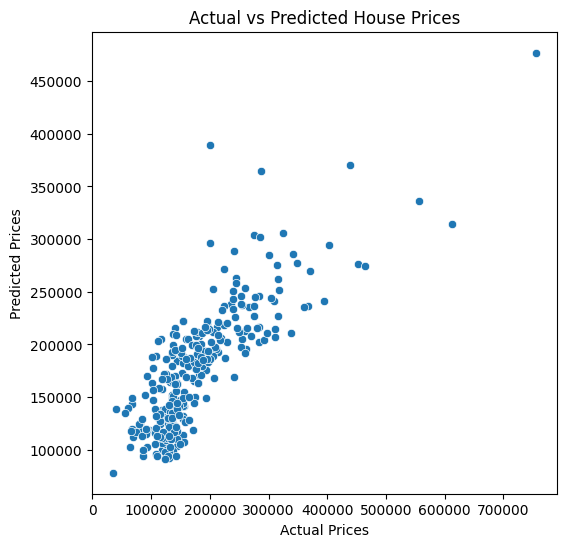

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
